## Logistic Regression - Client Subscription for Term Deposit


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Dataset

In [2]:
df_bank=pd.read_csv("bank_client.csv")

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### check for empty rows

In [5]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### check for duplicates

In [6]:
df_bank.duplicated().sum()

0

### Check for Outliers

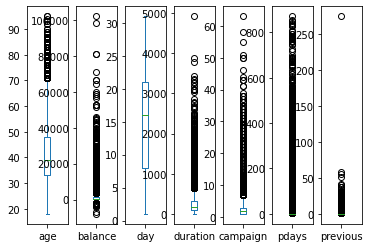

In [7]:
df_bank.plot(kind='box',subplots=True);

In [8]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df_bank.rename({"age":"Age","job":"Job","marital":"Marital","education":"Education","default":"Default","balance":"Balance",
                "housing":"Housing","loan":"Loan", "contact":"Contact","day":"Day","month":"Month","duration":"Duration",
                "campaign":"Campaign","pdays":"Pdays","previous":"Previous","poutcome":"Poutcome","y":"Y"},inplace=True,axis=1)

### Dealing with Outliers

In [10]:
df_bank_out=df_bank.copy()

In [109]:
df_bank_out.select_dtypes(include="number")

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5.0,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5.0,8,198.0,1.0,-1.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825.0,0,0,0,17.0,9,643.0,3.0,-1.0,0.0,3,1
45207,70.5,5,0,0,0,1729.0,0,0,0,17.0,9,456.0,2.0,-1.0,0.0,3,1
45208,70.5,5,1,1,0,3462.0,0,0,0,17.0,9,643.0,5.0,-1.0,0.0,2,1
45209,57.0,1,1,1,0,668.0,0,0,1,17.0,9,508.0,4.0,-1.0,0.0,3,0


In [12]:
for i in range(df_bank_out.select_dtypes(include="number").shape[1]):
    x=df_bank_out.select_dtypes(include="number").columns[i]
    if x=='Y':
        pass
    else:
        q3=df_bank_out[x].quantile(0.75)
        q1=df_bank_out[x].quantile(0.25)
        IQR=q3-q1
        UB=q3+(1.5*IQR)
        LB=q1-abs(1.5*IQR)
        df_bank_out[x]=np.where(df_bank_out[x]>UB,UB,df_bank_out[x])
        df_bank_out[x]=np.where(df_bank_out[x]<LB,LB,df_bank_out[x])

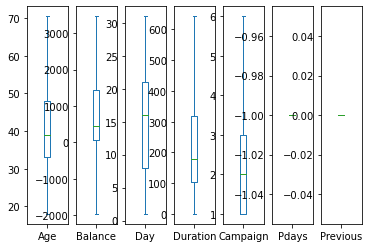

In [13]:
df_bank_out.plot(kind='box',subplots=True);

In [14]:
df_bank_out.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder=LabelEncoder()

In [17]:
df_bank_label=df_bank.copy()

In [18]:
for i in range(df_bank_label.select_dtypes(exclude="number").shape[1]):
        x=df_bank_label.select_dtypes(exclude="number").columns[i]
        df_bank[x]=label_encoder.fit_transform(df_bank[x])
        


In [19]:
df_bank_label.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
df_bank.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [21]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        45211 non-null  int64
 1   Job        45211 non-null  int32
 2   Marital    45211 non-null  int32
 3   Education  45211 non-null  int32
 4   Default    45211 non-null  int32
 5   Balance    45211 non-null  int64
 6   Housing    45211 non-null  int32
 7   Loan       45211 non-null  int32
 8   Contact    45211 non-null  int32
 9   Day        45211 non-null  int64
 10  Month      45211 non-null  int32
 11  Duration   45211 non-null  int64
 12  Campaign   45211 non-null  int64
 13  Pdays      45211 non-null  int64
 14  Previous   45211 non-null  int64
 15  Poutcome   45211 non-null  int32
 16  Y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


### Corealtion Analysis

In [22]:
corelation=np.round(df_bank.corr(),2)
corelation

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
Age,1.00,-0.02,-0.40,-0.11,-0.02,0.10,-0.19,-0.02,0.03,-0.01,-0.04,-0.00,0.00,-0.02,0.00,0.01,0.03
Job,-0.02,1.00,0.06,0.17,-0.01,0.02,-0.13,-0.03,-0.08,0.02,-0.09,0.00,0.01,-0.02,-0.00,0.01,0.04
Marital,-0.40,0.06,1.00,0.11,-0.01,0.00,-0.02,-0.05,-0.04,-0.01,-0.01,0.01,-0.01,0.02,0.01,-0.02,0.05
Education,-0.11,0.17,0.11,1.00,-0.01,0.06,-0.09,-0.05,-0.11,0.02,-0.06,0.00,0.01,0.00,0.02,-0.02,0.07
Default,-0.02,-0.01,-0.01,-0.01,1.00,-0.07,-0.01,0.08,0.02,0.01,0.01,-0.01,0.02,-0.03,-0.02,0.03,-0.02
Balance,0.10,0.02,0.00,0.06,-0.07,1.00,-0.07,-0.08,-0.03,0.00,0.02,0.02,-0.01,0.00,0.02,-0.02,0.05
Housing,-0.19,-0.13,-0.02,-0.09,-0.01,-0.07,1.00,0.04,0.19,-0.03,0.27,0.01,-0.02,0.12,0.04,-0.10,-0.14
Loan,-0.02,-0.03,-0.05,-0.05,0.08,-0.08,0.04,1.00,-0.01,0.01,0.02,-0.01,0.01,-0.02,-0.01,0.02,-0.07
Contact,0.03,-0.08,-0.04,-0.11,0.02,-0.03,0.19,-0.01,1.00,-0.03,0.36,-0.02,0.02,-0.24,-0.15,0.27,-0.15
Day,-0.01,0.02,-0.01,0.02,0.01,0.00,-0.03,0.01,-0.03,1.00,-0.01,-0.03,0.16,-0.09,-0.05,0.08,-0.03


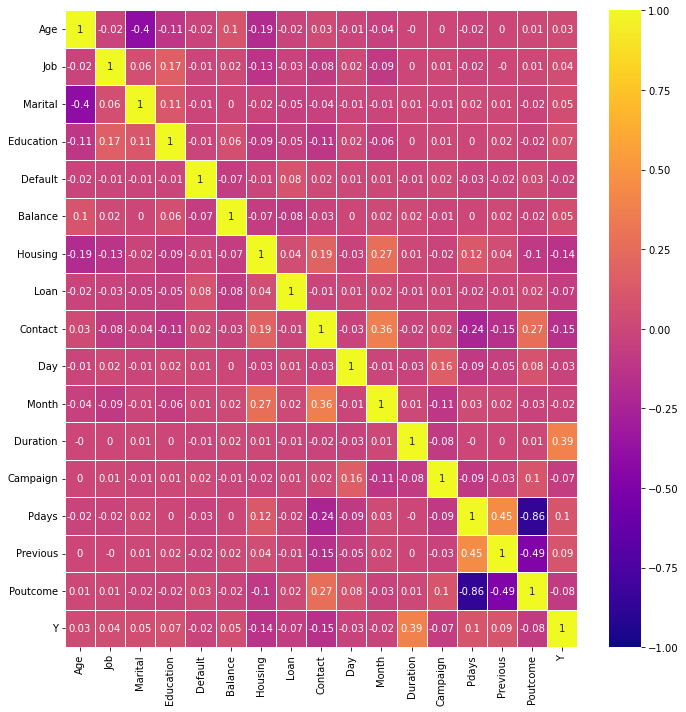

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=corelation,vmax=1,vmin=-1,cmap='plasma',annot=True,linewidths=0.5,ax=ax)
plt.tight_layout();

## Buliding model with Outliers

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg=LogisticRegression()

In [26]:
x=df_bank.drop("Y",axis=1)
y=df_bank["Y"]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [28]:
model=log_reg.fit(x_train,y_train)

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
model.coef_

array([[-2.36873004e-02,  1.80185958e-02, -1.07699424e-01,
        -6.44603950e-03, -6.71378849e-03,  3.41527248e-05,
        -2.21046475e-01, -6.38429744e-02, -2.28531081e-01,
        -1.89256629e-02, -6.26596536e-02,  3.47767184e-03,
        -3.29011368e-01, -1.09006928e-03,  1.43823530e-01,
        -2.23006613e-01]])

In [30]:
model.intercept_

array([-0.08655209])

### Predictions

In [31]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [32]:
pred_train[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Prediction Probability

In [34]:
predi_prob_Xtest=np.round(log_reg.predict_proba(x_test),2)
predi_prob_Xtest

array([[0.93, 0.07],
       [0.91, 0.09],
       [0.81, 0.19],
       ...,
       [0.99, 0.01],
       [0.76, 0.24],
       [0.96, 0.04]])

### Confusion Matrix

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

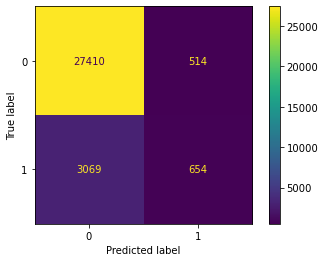

In [36]:
ConfusionMatrixDisplay.from_predictions(y_train,pred_train);

### Model Accuracy

In [37]:
df_bank["Y"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Y, dtype: float64

In [38]:
(27415+649)/(27415+509+3074+649)

0.8867823174392517

### Precision,Recall,F1-Score,Accuracy

In [39]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27924
           1       0.56      0.18      0.27      3723

    accuracy                           0.89     31647
   macro avg       0.73      0.58      0.60     31647
weighted avg       0.86      0.89      0.86     31647



### ROC Curve

In [40]:
from sklearn.metrics import RocCurveDisplay

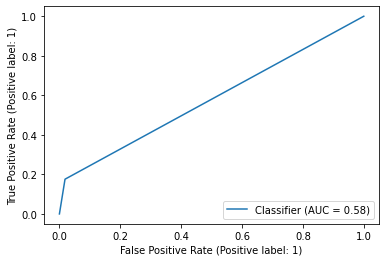

In [41]:
RocCurveDisplay.from_predictions(y_train,pred_train);

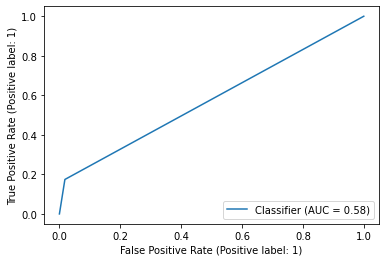

In [42]:
RocCurveDisplay.from_predictions(y_test,pred_test);

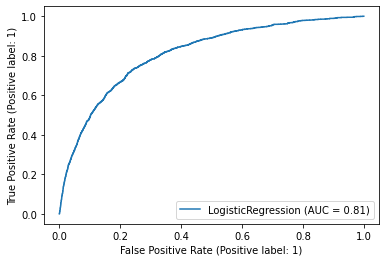

In [43]:
RocCurveDisplay.from_estimator(log_reg,x_test,y_test);

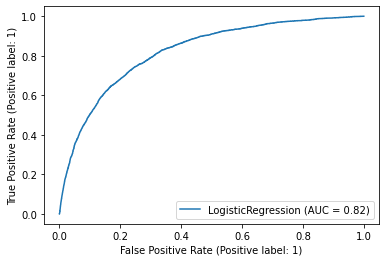

In [44]:
RocCurveDisplay.from_estimator(log_reg,x_train,y_train);

## Model Building without Outliers

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df_bank=pd.read_csv("bank_client.csv")

df_bank.rename({"age":"Age","job":"Job","marital":"Marital","education":"Education","default":"Default","balance":"Balance",
                "housing":"Housing","loan":"Loan", "contact":"Contact","day":"Day","month":"Month","duration":"Duration",
                "campaign":"Campaign","pdays":"Pdays","previous":"Previous","poutcome":"Poutcome","y":"Y"},inplace=True,axis=1)

df_bank_out=df_bank.copy()


for i in range(df_bank_out.select_dtypes(include="number").shape[1]):
    x=df_bank_out.select_dtypes(include="number").columns[i]
    if x=='Y':
        pass
    else:
        q3=df_bank_out[x].quantile(0.75)
        q1=df_bank_out[x].quantile(0.25)
        IQR=q3-q1
        UB=q3+(1.5*IQR)
        LB=q1-abs(1.5*IQR)
        df_bank_out[x]=np.where(df_bank_out[x]>UB,UB,df_bank_out[x])
        df_bank_out[x]=np.where(df_bank_out[x]<LB,LB,df_bank_out[x])

In [46]:
df_bank_out.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


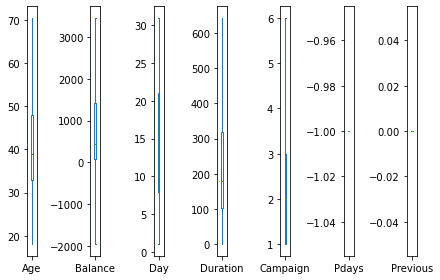

In [47]:
df_bank_out.plot(kind='box',subplots=True)
plt.tight_layout();

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

In [49]:
df_bank_label=df_bank_out.copy()

In [50]:
for i in range(df_bank_label.select_dtypes(exclude="number").shape[1]):
        x=df_bank_label.select_dtypes(exclude="number").columns[i]
        df_bank_out[x]=label_encoder.fit_transform(df_bank_out[x])
        

In [51]:
df_bank_label.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [52]:
df_bank_out.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5.0,8,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5.0,8,198.0,1.0,-1.0,0.0,3,0


In [53]:
df_bank_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        45211 non-null  float64
 1   Job        45211 non-null  int32  
 2   Marital    45211 non-null  int32  
 3   Education  45211 non-null  int32  
 4   Default    45211 non-null  int32  
 5   Balance    45211 non-null  float64
 6   Housing    45211 non-null  int32  
 7   Loan       45211 non-null  int32  
 8   Contact    45211 non-null  int32  
 9   Day        45211 non-null  float64
 10  Month      45211 non-null  int32  
 11  Duration   45211 non-null  float64
 12  Campaign   45211 non-null  float64
 13  Pdays      45211 non-null  float64
 14  Previous   45211 non-null  float64
 15  Poutcome   45211 non-null  int32  
 16  Y          45211 non-null  int32  
dtypes: float64(7), int32(10)
memory usage: 4.1 MB


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

In [55]:
x=df_bank_out.drop("Y",axis=1)
y=df_bank_out["Y"]

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [57]:
model=log_reg.fit(x_train,y_train)

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [58]:
model.coef_

array([[-3.55122535e-02, -9.76679590e-03, -1.47240654e-01,
        -7.35263858e-03, -8.96175857e-03,  2.24556981e-04,
        -3.05735197e-01, -8.85840757e-02, -3.08431476e-01,
        -1.28799400e-02, -2.81677823e-02,  5.98612450e-03,
        -3.20285012e-01,  1.22696903e-01,  0.00000000e+00,
        -3.70605574e-01]])

In [59]:
model.intercept_

array([-0.12271141])

In [60]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [61]:
pred_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
predi_prob_Xtest=np.round(log_reg.predict_proba(x_test),2)
predi_prob_Xtest

array([[0.92, 0.08],
       [0.96, 0.04],
       [0.89, 0.11],
       ...,
       [0.99, 0.01],
       [0.79, 0.21],
       [0.97, 0.03]])

In [64]:
df_bank_out["Y"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Y, dtype: float64

In [65]:
df_bank_out["Y"].value_counts()

0    39922
1     5289
Name: Y, dtype: int64

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

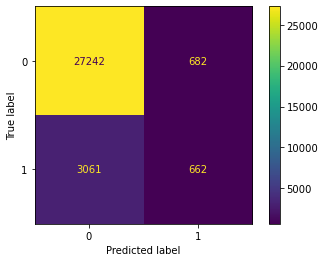

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train,pred_train);

In [68]:
(27242+662)/(27242+682+3061+662)

0.8817265459601226

In [69]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27924
           1       0.49      0.18      0.26      3723

    accuracy                           0.88     31647
   macro avg       0.70      0.58      0.60     31647
weighted avg       0.85      0.88      0.86     31647



In [70]:
from sklearn.metrics import RocCurveDisplay

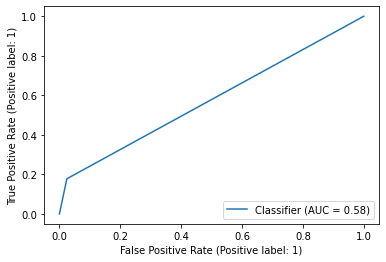

In [71]:
RocCurveDisplay.from_predictions(y_train,pred_train);

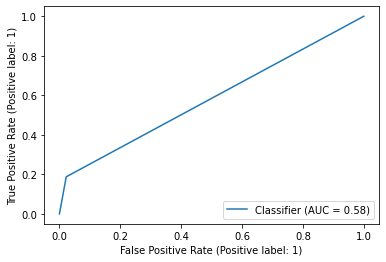

In [72]:
RocCurveDisplay.from_predictions(y_test,pred_test);

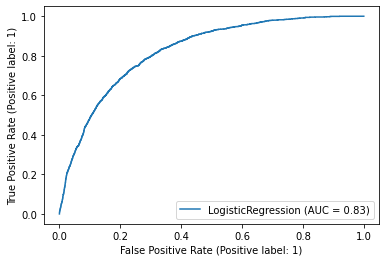

In [73]:
RocCurveDisplay.from_estimator(log_reg,x_test,y_test);

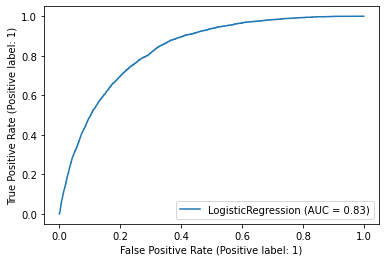

In [74]:
RocCurveDisplay.from_estimator(log_reg,x_train,y_train);

### Model building with one hot enconding for string features

In [75]:
df_bank=pd.read_csv("bank_client.csv")

In [76]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [77]:
### EDA

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [78]:
### check for empty rows

df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [79]:
### check for duplicates

df_bank.duplicated().sum()

0

In [80]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [81]:
df_bank.rename({"age":"Age","job":"Job","marital":"Marital","education":"Education","default":"Default","balance":"Balance",
                "housing":"Housing","loan":"Loan", "contact":"Contact","day":"Day","month":"Month","duration":"Duration",
                "campaign":"Campaign","pdays":"Pdays","previous":"Previous","poutcome":"Poutcome","y":"Y"},inplace=True,axis=1)

In [82]:
df_bank=pd.get_dummies(df_bank,drop_first=True,columns=['Job','Marital','Education','Contact','Poutcome','Month'])# drop first drops the first alphabetical coulmn here its C this is dropped 3 levels so 3-1=2 2 new coulmns are added .
df_bank.head()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Pdays,Previous,...,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
df_bank['Default']=np.where(df_bank['Default'].str.contains('yes'),1,0)
df_bank['Housing']=np.where(df_bank['Housing'].str.contains('yes'),1,0)
df_bank['Loan']=np.where(df_bank['Loan'].str.contains('yes'),1,0)
df_bank['Y']=np.where(df_bank['Y'].str.contains('yes'),1,0)

df_bank.head()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Pdays,Previous,...,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [84]:
pd.set_option("display.max.columns", None)
df_bank.head()

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Pdays,Previous,Y,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Contact_telephone,Contact_unknown,Poutcome_other,Poutcome_success,Poutcome_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [85]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  45211 non-null  int64
 1   Default              45211 non-null  int32
 2   Balance              45211 non-null  int64
 3   Housing              45211 non-null  int32
 4   Loan                 45211 non-null  int32
 5   Day                  45211 non-null  int64
 6   Duration             45211 non-null  int64
 7   Campaign             45211 non-null  int64
 8   Pdays                45211 non-null  int64
 9   Previous             45211 non-null  int64
 10  Y                    45211 non-null  int32
 11  Job_blue-collar      45211 non-null  uint8
 12  Job_entrepreneur     45211 non-null  uint8
 13  Job_housemaid        45211 non-null  uint8
 14  Job_management       45211 non-null  uint8
 15  Job_retired          45211 non-null  uint8
 16  Job_self-employed    4

In [86]:
### Corealtion Analysis

corelation=np.round(df_bank.corr(),2)
corelation

,Age,Default,Balance,Housing,Loan,Day,Duration,Campaign,Pdays,Previous,Y,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Contact_telephone,Contact_unknown,Poutcome_other,Poutcome_success,Poutcome_unknown,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct,Month_sep
Age,1.00,-0.02,0.10,-0.19,-0.02,-0.01,-0.00,0.00,-0.02,0.00,0.03,-0.04,0.02,0.09,-0.02,0.45,-0.01,-0.07,-0.20,-0.07,0.00,0.05,0.29,-0.43,-0.09,-0.08,0.07,0.17,-0.02,-0.02,0.04,-0.00,0.07,0.02,-0.00,-0.01,0.00,0.05,0.02,-0.13,0.03,0.06,0.03
Default,-0.02,1.00,-0.07,-0.01,0.08,0.01,-0.01,0.02,-0.03,-0.02,-0.02,0.01,0.03,-0.00,-0.00,-0.01,0.00,0.00,-0.02,-0.00,0.01,-0.01,-0.01,0.00,0.01,-0.02,-0.00,-0.02,0.02,-0.01,-0.02,0.04,-0.01,-0.01,-0.01,-0.01,0.04,0.01,-0.01,-0.00,0.01,-0.02,-0.01
Balance,0.10,-0.07,1.00,-0.07,-0.08,0.00,0.02,-0.01,0.00,0.02,0.05,-0.05,0.01,0.00,0.07,0.05,0.02,-0.04,0.00,-0.02,0.01,0.01,0.03,-0.01,-0.07,0.08,0.01,0.04,-0.04,0.01,0.04,-0.03,0.01,0.02,-0.00,-0.02,-0.06,0.03,0.02,-0.07,0.12,0.04,0.02
Housing,-0.19,-0.01,-0.07,1.00,0.04,-0.03,0.01,-0.02,0.12,0.04,-0.14,0.18,0.01,-0.08,-0.06,-0.16,-0.03,0.07,-0.09,-0.01,-0.05,-0.08,0.02,-0.02,0.10,-0.10,-0.05,-0.08,0.21,0.04,-0.09,-0.06,-0.31,-0.05,-0.06,-0.07,-0.06,-0.10,-0.07,0.43,0.00,-0.09,-0.08
Loan,-0.02,0.08,-0.08,0.04,1.00,0.01,-0.01,0.01,-0.02,-0.01,-0.07,0.02,0.04,-0.02,-0.04,-0.01,-0.01,0.04,-0.06,0.01,-0.04,-0.03,0.04,-0.05,0.07,-0.05,-0.05,-0.01,-0.01,-0.01,-0.05,0.03,-0.07,-0.02,-0.01,-0.00,0.17,-0.02,-0.03,-0.03,0.02,-0.03,-0.03
Day,-0.01,0.01,0.00,-0.03,0.01,1.00,-0.03,0.16,-0.09,-0.05,-0.03,-0.02,-0.00,0.00,0.02,-0.01,0.01,-0.01,-0.02,0.03,-0.01,-0.01,0.01,-0.01,-0.01,0.02,0.00,0.02,-0.03,-0.03,-0.03,0.09,0.03,-0.01,-0.28,0.25,0.15,-0.19,-0.02,-0.03,0.10,0.03,-0.05
Duration,-0.00,-0.01,0.02,0.01,-0.01,-0.03,1.00,-0.08,-0.00,0.00,0.39,0.01,-0.00,-0.01,-0.01,0.03,0.01,0.00,-0.01,-0.01,0.02,-0.01,-0.02,0.02,0.00,0.00,-0.00,-0.02,-0.01,-0.00,0.04,-0.00,-0.04,0.02,-0.01,0.01,0.02,-0.02,-0.01,0.01,-0.01,0.02,0.02
Campaign,0.00,0.02,-0.01,-0.02,0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07,0.01,0.00,0.00,0.02,-0.03,0.01,-0.00,-0.02,0.02,-0.02,0.01,0.03,-0.02,-0.02,0.01,0.01,0.05,0.00,-0.02,-0.06,0.11,0.15,-0.01,-0.03,-0.06,0.10,0.04,-0.02,-0.07,-0.08,-0.05,-0.04
Pdays,-0.02,-0.03,0.00,0.12,-0.02,-0.09,-0.00,-0.09,1.00,0.45,0.10,0.02,-0.01,-0.03,-0.01,-0.01,-0.01,0.01,0.02,-0.01,-0.01,-0.02,-0.03,0.03,0.02,-0.01,-0.01,0.02,-0.25,0.39,0.23,-0.87,-0.11,0.05,0.07,0.05,-0.14,-0.11,0.03,0.08,0.01,0.06,0.08
Previous,0.00,-0.02,0.02,0.04,-0.01,-0.05,0.00,-0.03,0.45,1.00,0.09,-0.02,-0.01,-0.02,0.02,0.01,-0.00,-0.01,0.02,-0.00,-0.01,-0.01,-0.01,0.02,-0.01,0.02,-0.01,0.03,-0.15,0.31,0.20,-0.53,-0.05,0.04,0.07,0.05,-0.08,-0.06,0.03,0.00,0.04,0.05,0.06


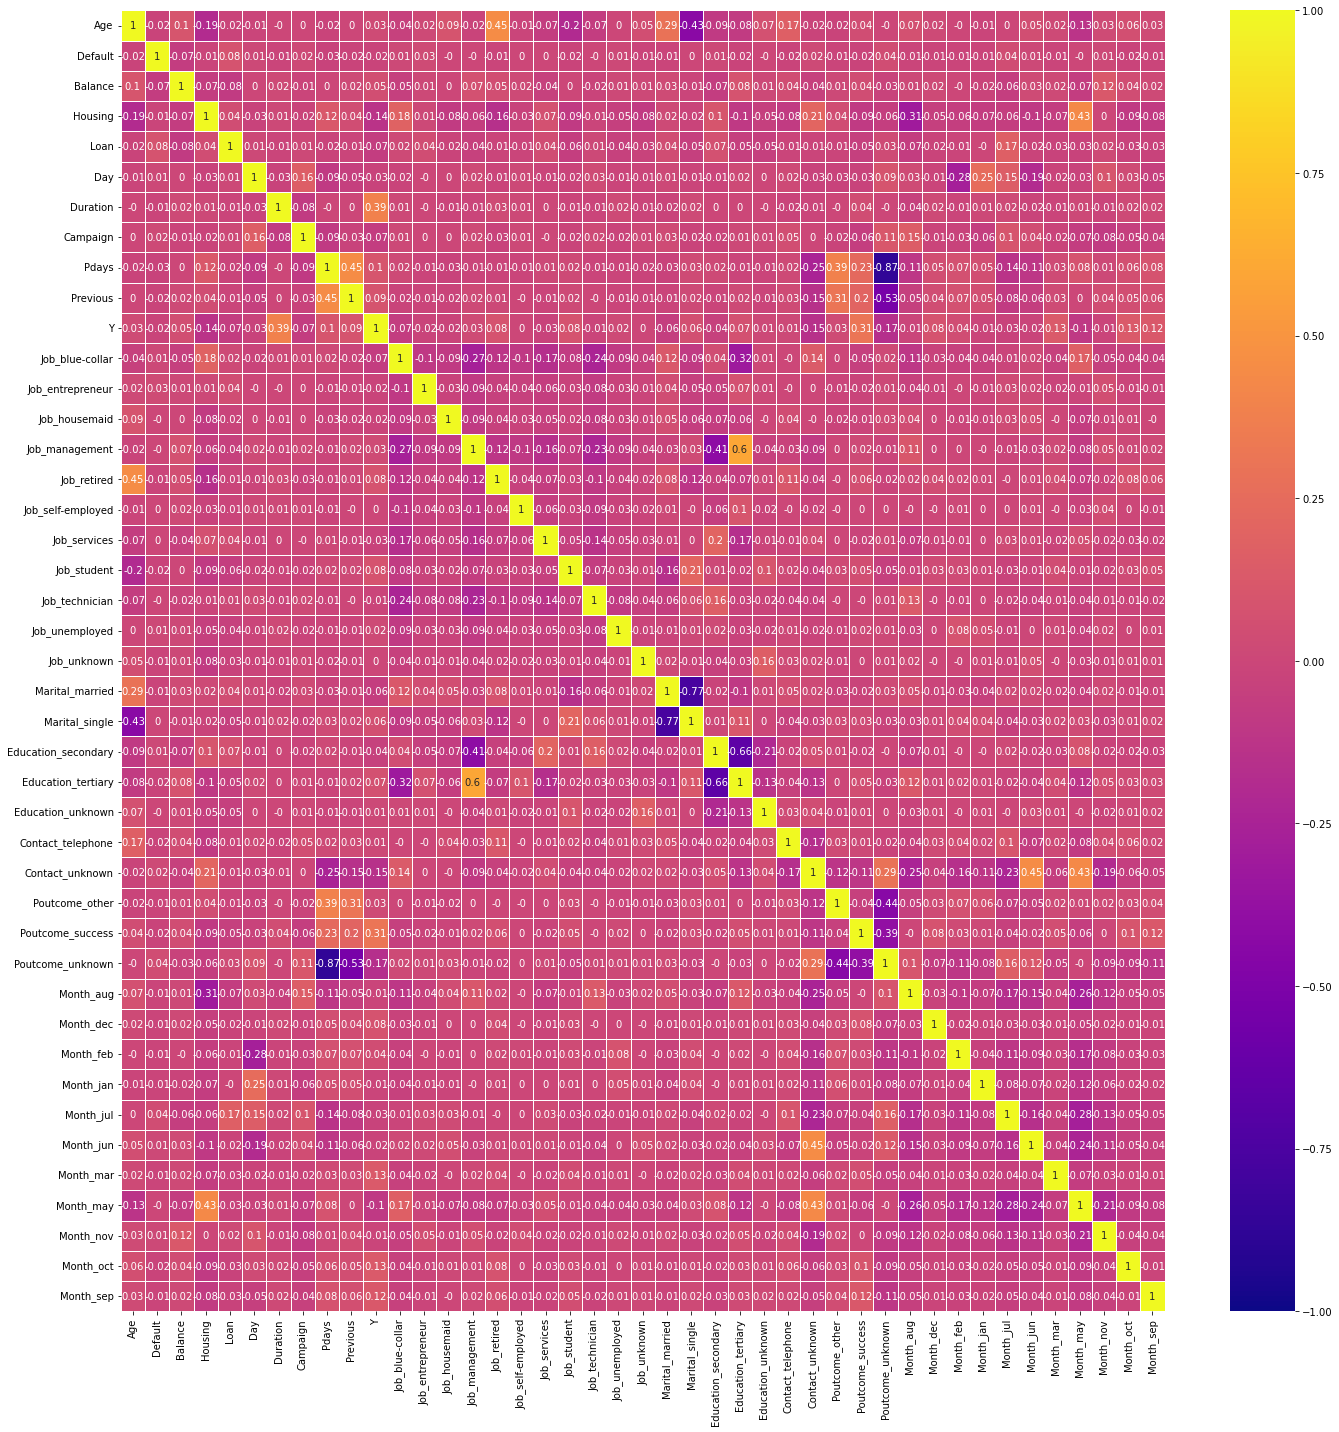

In [87]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data=corelation,vmax=1,vmin=-1,cmap='plasma',annot=True,linewidths=0.5,ax=ax)
plt.tight_layout();

In [88]:

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

In [89]:
x=df_bank.drop("Y",axis=1)
y=df_bank["Y"]

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [91]:
model=log_reg.fit(x_train,y_train)

C:\Users\Sachin Ganapathy\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [92]:
model.coef_

array([[-1.71976992e-02, -2.32968926e-02,  2.28977009e-05,
        -7.43519463e-01, -2.12982633e-01, -1.04258800e-02,
         3.80305504e-03, -4.02176102e-01,  2.40280972e-03,
        -1.43210707e-01, -2.91333750e-01, -2.74470190e-02,
        -9.42896134e-03,  1.28895943e-02,  1.83077804e-01,
        -2.02034671e-02, -1.03116305e-01,  3.47998142e-02,
        -7.15378869e-02,  3.21416950e-03,  4.46864954e-03,
        -1.86527053e-01, -1.31844701e-01, -3.18841865e-01,
         8.12613847e-02,  1.44302019e-02,  5.59803849e-02,
        -4.79338023e-01, -3.37534971e-02,  3.53209794e-01,
        -4.80625969e-01,  2.95143641e-02,  2.78890385e-02,
        -1.64735895e-02, -8.34806292e-03, -9.89708870e-02,
        -7.06053006e-02,  1.03211944e-01, -4.55495260e-01,
        -6.21900195e-02,  1.12155173e-01,  8.22013648e-02]])

In [93]:
model.intercept_

array([-0.31453656])

In [94]:
### Predictions

pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [95]:
pred_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
### Prediction Probability

predi_prob_Xtest=np.round(log_reg.predict_proba(x_test),2)
predi_prob_Xtest

array([[0.96, 0.04],
       [0.89, 0.11],
       [0.85, 0.15],
       ...,
       [0.99, 0.01],
       [0.87, 0.13],
       [0.97, 0.03]])

In [98]:
### Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay,classification_report

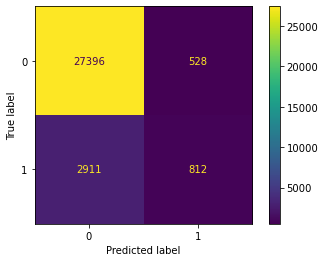

In [99]:
ConfusionMatrixDisplay.from_predictions(y_train,pred_train);

In [100]:
### Model Accuracy

df_bank["Y"].value_counts(normalize=True)

0    0.883015
1    0.116985
Name: Y, dtype: float64

In [101]:

(27396+812)/(2911+528+27396+812)

0.891332511770468

In [102]:
### Precision,Recall,F1-Score,Accuracy

print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27924
           1       0.61      0.22      0.32      3723

    accuracy                           0.89     31647
   macro avg       0.75      0.60      0.63     31647
weighted avg       0.87      0.89      0.87     31647



In [103]:
### ROC Curve

from sklearn.metrics import RocCurveDisplay

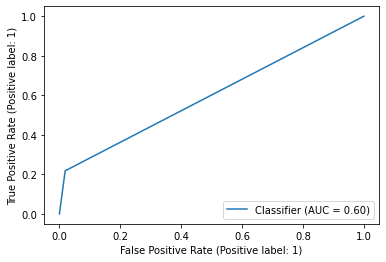

In [104]:
RocCurveDisplay.from_predictions(y_train,pred_train);

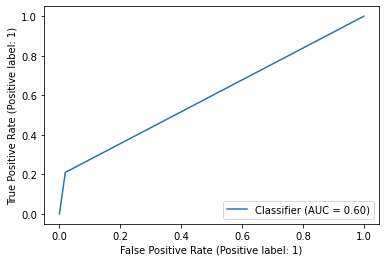

In [105]:
RocCurveDisplay.from_predictions(y_test,pred_test);

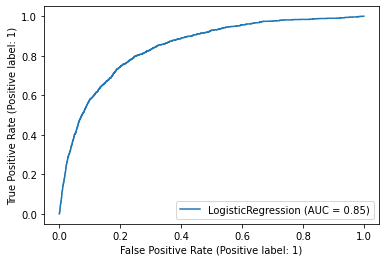

In [106]:
RocCurveDisplay.from_estimator(log_reg,x_test,y_test);

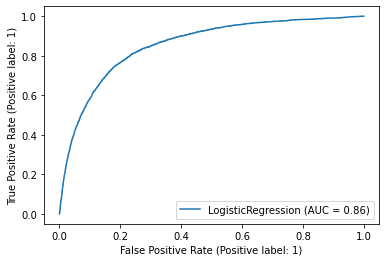

In [107]:
RocCurveDisplay.from_estimator(log_reg,x_train,y_train);

## Therefore using one hot encoding to convert the string values to binary values and for few columns custom binary encoding gives better model then label enconding and without outliers model